In [103]:
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
from requests_html import HTMLSession
import matplotlib.pyplot as plt

def getInfo(companies):
    
    
    list_company=companies.split(",")



    data=[]
    for i in list_company:
        try:

            company = i.strip().replace(' ','-')

            # print(company)


            try:
                url = "https://www.ndtv.com/search?searchtext="+company
                session = HTMLSession()
                response = session.get(url)

            except requests.exceptions.RequestException as e:
                print("Enter valid Company")
            get_nav_links = response.html.find('ul.src_lst-ul')

            news = get_nav_links[0].text[:get_nav_links[0].text.index("More News")].split("\n")
            # print(news)
            news_list=[]

            pos=1
            for i in range(len(news)):
                news_list.append(news[i].split("|"))
            # print(news_list)
            #extracting date
            dates=[]
            i=1  
            while (i < len(news_list)):

                dates.append(news_list[i][-1].split(",")[-1])
                i=i+4
                # print(dates)
            # print("==================================================",end="\n")
            #extracting heading
            headings=[]

            i=0 

            while (i < len(news_list)):

                headings.append(news_list[i][0])
                i=i+4


            # print(headings)
            j=2
            text=[]
            while (j < len(news_list)):
                text.append(news_list[j][0])
                j=j+4
            # print(text)
            # print("==================================================",end="\n")

            total_text = []

            for i,j in zip(text,headings):
                total_text.append(i+j)
            # print(total_text)

            company_name = []
            for i in range(len(dates)):
                company_name.append(company);
            # print(company_name)


            for a, b, c in zip(company_name,total_text,dates):

                data.append([a, b, c])
        except Exception as e:
            print("ENter the right company name")



    # print(data[0])
    df = pd.DataFrame(data,columns =['Company','Total_text','Date'])
    df
    vader  = SentimentIntensityAnalyzer()
    f = lambda text: vader.polarity_scores(text)['compound']
    df['Compound'] = df['Total_text'].apply(f)
    df['Date'] = df['Date'].astype(int)

    mean_df = df.groupby(['Company']).mean()
    mean_df.transpose()
    ax = mean_df.plot( kind='bar',y='Compound',rot=0)
    ax.figure.savefig('plot',
                pad_inches = 10)
    return mean_df.to_json()

'{"Date":{"infosys":2022.0,"tcs":2022.0,"wipro":2021.8},"Compound":{"infosys":0.1380066667,"tcs":0.5062066667,"wipro":0.53378}}'

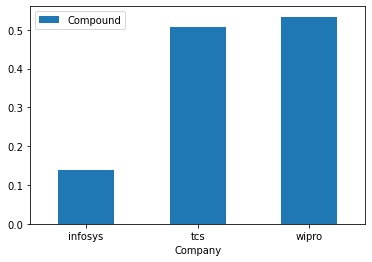

In [104]:


getInfo('tcs,infosys,wipro')

